In [125]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from datetime import datetime

import random
import pyprind
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import seaborn as sns
from sklearn.cluster import k_means
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import california_housing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from numpy.random import randint

sns.set(context='notebook', style='whitegrid', font_scale=2)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/fwilhelm/.virtualenvs/venv3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [36]:
import sklearn
import tensorflow as tf
import pandas as pd

In [37]:
col_names = [x.split(':')[0] for x in open('input/cal_housing.domain').readlines()]
df = pd.read_csv('./input/cal_housing.data', names=col_names)
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200


In [38]:
for col in ('totalBedrooms', 'totalRooms'):
    df[col] /= df['households']
    df = df.rename(columns={col: col.replace('total', 'avg')})
df['avgOccupation'] = df['population'] / df['households']
df = df.drop('households', axis=1)
df['medianHouseValue'] /= 100000
df.head()

,longitude,latitude,housingMedianAge,avgRooms,avgBedrooms,population,medianIncome,medianHouseValue,avgOccupation
0,-122.23,37.88,41,6.984127,1.023810,322,8.3252,4.526,2.555556
1,-122.22,37.86,21,6.238137,0.971880,2401,8.3014,3.585,2.109842
2,-122.24,37.85,52,8.288136,1.073446,496,7.2574,3.521,2.802260
3,-122.25,37.85,52,5.817352,1.073059,558,5.6431,3.413,2.547945
4,-122.25,37.85,52,6.281853,1.081081,565,3.8462,3.422,2.181467


In [39]:
df.describe()

,longitude,latitude,housingMedianAge,avgRooms,avgBedrooms,population,medianIncome,medianHouseValue,avgOccupation
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,5.429000,1.096675,1425.476744,3.870671,2.068558,3.070655
std,2.003532,2.135952,12.585558,2.474173,0.473911,1132.462122,1.899822,1.153956,10.386050
min,-124.350000,32.540000,1.000000,0.846154,0.333333,3.000000,0.499900,0.149990,0.692308
25%,-121.800000,33.930000,18.000000,4.440716,1.006079,787.000000,2.563400,1.196000,2.429741
50%,-118.490000,34.260000,29.000000,5.229129,1.048780,1166.000000,3.534800,1.797000,2.818116
75%,-118.010000,37.710000,37.000000,6.052381,1.099526,1725.000000,4.743250,2.647250,3.282261
max,-114.310000,41.950000,52.000000,141.909091,34.066667,35682.000000,15.000100,5.000010,1243.333333


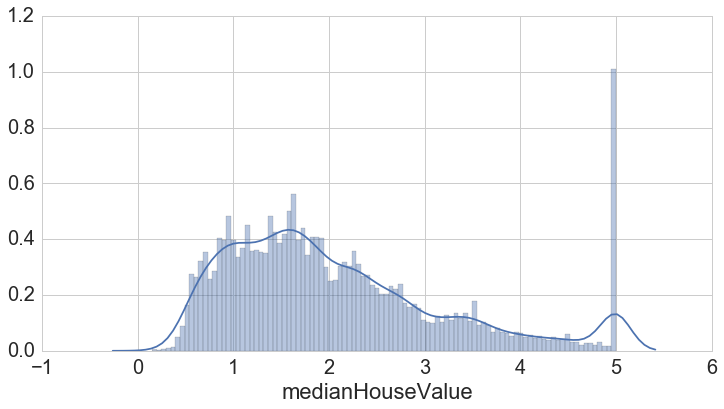

In [40]:
sns.distplot(df.medianHouseValue, bins=100)

In [41]:
target = 'medianHouseValue'
X = df.drop(target, axis=1).values
y = df[target].values[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
y_train.shape

(16512, 1)

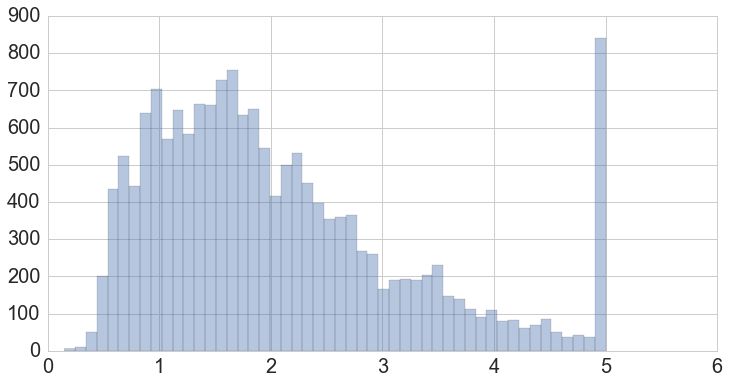

In [43]:
sns.distplot(y_train, kde=False, bins=50)

In [44]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
k_means(X_train, 8)[0]

array([[ 0.2450249 ,  0.57832236,  0.60126085,  0.03367054,  0.03000224,
         0.03285442,  0.23679148,  0.00191293],
       [ 0.22864106,  0.5666182 ,  0.91961158,  0.02945324,  0.02878683,
         0.02734535,  0.20429444,  0.0023329 ],
       [ 0.63185077,  0.14367747,  0.60271836,  0.02771682,  0.02864658,
         0.04015085,  0.19931211,  0.0019958 ],
       [ 0.4516854 ,  0.38084897,  0.36297623,  0.03350033,  0.0321969 ,
         0.03842919,  0.16844364,  0.00194564],
       [ 0.61012264,  0.15791156,  0.86037377,  0.02735275,  0.02840966,
         0.03044118,  0.19462936,  0.00211349],
       [ 0.25807829,  0.61322119,  0.2853128 ,  0.03735627,  0.03311533,
         0.04541449,  0.25013972,  0.00170057],
       [ 0.67588129,  0.12338488,  0.2567102 ,  0.0337937 ,  0.03182326,
         0.05650078,  0.24584665,  0.00176273],
       [ 0.60758687,  0.15017273,  0.51650869,  0.0439221 ,  0.02782102,
         0.03722677,  0.51427744,  0.00177856]])

In [46]:
def random_index_list(list_size, sample_size):
    '''
    Creates a list of random integers that are constrained in the max value. May
 have repeating indexes.
    :param list_size: Integer denoting the length of the final list.
    :param sample_size: Integer denoting the maximum index to include.
    :return: List of integers.
    '''

    return [random.randint(0, sample_size - 1) for i in range(0, list_size)]


In [114]:
class ANN(object):
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        self._graph = tf.Graph()
        self.session = None
        self._initialized = False

    def get_model(self, n_features, means):
        with tf.name_scope('input'):
            x = tf.placeholder("float", shape=[None, n_features], name='X')
            self._x = x
        with tf.name_scope('hidden'):
            c = [tf.Variable(tf.constant(means[i,:].astype(np.float32), shape=[1, n_features]), name='c')
                 for i in range(self.n_hidden)]
            r = [tf.Variable([0.1], name="r")
                 for i in range(self.n_hidden)]
            h = [tf.exp(-tf.div(tf.reduce_sum(tf.square(tf.sub(x, c[i])), 1, keep_dims=True), tf.square(r[i]))) 
                 for i in range(self.n_hidden)]
            self._c, self._r = c, r
        with tf.name_scope('output'):
            a = tf.Variable(tf.truncated_normal([self.n_hidden, 1], stddev=0.01), name='A')
            y = tf.matmul(tf.concat(1, h), a)
            self._a = a
        return y

    def add_cost(self, yhat):
        self._y = tf.placeholder("float", shape=[None, 1], name='Y')
        loss = tf.nn.l2_loss(tf.sub(self._y, yhat))
        return loss

    def _init(self, n_features, means):
        with self._graph.as_default():
            self._model = self.get_model(n_features, means)
            self._costfunc = self.add_cost(self._model)
            self._train_a = tf.train.AdamOptimizer().minimize(self._costfunc, var_list=[self._a])
            self._train_rbf = tf.train.AdamOptimizer().minimize(self._costfunc, var_list=self._c)
            #self.summaries = tf.merge_all_summaries()
            self.session = tf.Session(graph=self._graph)
            self.session.run(tf.initialize_all_variables())
            self._writer = tf.train.SummaryWriter("./logs", self.session.graph_def)
            #self.saver = tf.train.Saver()
            self._initialized = True
        
    def _fit(self, X, y, steps=50, batch=200):
        n_samples = X.shape[0]

        for step in xrange(steps):
            batch_indices = randint(n_samples, size=self.batch)
            pbar.update()
            x = X[batch_indices]
            y_ = y[batch_indices]
            if run % 1000 == 0:
               result, cost = self.session.run([self.summaries, self._costfunc], feed_dict={self._x: x, self._y_: y_})
               #print("Cost: {}".format(cost))
               self.writer.add_summary(result, run)
            else:
                self.session.run([self._train_step], feed_dict={self._x: x, self._y_: y_})
    
    def get_variables(self):
        with self._graph.as_default():
            return {var.name: var for var in tf.all_variables()}
                
    def fit(self, X, y, steps=50, batch=200):
        n_samples, n_features = X.shape

        if not self._initialized:
            means = k_means(X, self.n_hidden, random_state=42)[0]
            self._init(n_features, means)

        pbar = pyprind.ProgBar(steps)
        for step in range(steps):
            for i in range(100):
                batch_indices = randint(n_samples, size=batch)
                self.session.run(self._train_a, feed_dict={self._x: X[batch_indices,:],
                                                           self._y: y[batch_indices]})
            for i in range(10):
                batch_indices = randint(n_samples, size=batch)
                self.session.run(self._train_rbf, feed_dict={self._x: X[batch_indices],
                                                             self._y: y[batch_indices]})
            for i in range(100):
                batch_indices = randint(n_samples, size=batch)
                self.session.run(self._train_a, feed_dict={self._x: X[batch_indices,:],
                                                           self._y: y[batch_indices]})
            _, cost = self.session.run([self._train_a, self._costfunc], feed_dict={self._x: X[batch_indices, :],
                                                               self._y: y[batch_indices]})
            print("Cost: {}".format(cost))
            pbar.update()
        return self

    def predict(self, X):
        return self.session.run(self._model, feed_dict={self._x: X})

In [115]:
ann = ANN(15)

In [122]:
ann.fit(X_train, y_train, steps=1000, batch=200)

0%                          100%
[                              ]

Cost: 212.50299072265625
Cost: 174.17495727539062
Cost: 232.98245239257812
Cost: 240.62869262695312
Cost: 219.45289611816406
Cost: 200.84811401367188
Cost: 192.1119842529297
Cost: 250.87774658203125
Cost: 201.32940673828125
Cost: 218.2464599609375
Cost: 191.7954864501953
Cost: 209.52642822265625
Cost: 166.6650848388672
Cost: 247.16859436035156
Cost: 245.22650146484375
Cost: 252.22552490234375
Cost: 232.51983642578125
Cost: 172.82199096679688
Cost: 188.606201171875
Cost: 213.22940063476562
Cost: 200.70559692382812
Cost: 246.81329345703125
Cost: 186.64981079101562
Cost: 215.1568145751953
Cost: 219.70877075195312
Cost: 241.1107177734375
Cost: 196.97560119628906
Cost: 228.8062744140625
Cost: 220.72982788085938
Cost: 209.7710418701172
Cost: 260.93353271484375
Cost: 264.3656005859375
Cost: 196.7989044189453
Cost: 219.68487548828125

[#                             ] | ETA: 00:03:11


Cost: 199.51644897460938
Cost: 186.70196533203125
Cost: 213.25582885742188
Cost: 283.1278381347656
Cost: 143.53550720214844
Cost: 198.67562866210938
Cost: 244.87649536132812
Cost: 203.5875244140625
Cost: 221.15936279296875
Cost: 209.43214416503906
Cost: 227.65008544921875
Cost: 212.54458618164062
Cost: 212.61460876464844
Cost: 234.64306640625
Cost: 217.03292846679688
Cost: 241.8431396484375
Cost: 196.375244140625
Cost: 171.58627319335938
Cost: 215.1170654296875
Cost: 187.21791076660156
Cost: 207.95628356933594
Cost: 205.15994262695312
Cost: 221.03536987304688
Cost: 232.6841278076172
Cost: 213.09603881835938
Cost: 204.9274139404297
Cost: 265.7167663574219
Cost: 233.4307861328125
Cost: 191.02804565429688
Cost: 187.72323608398438
Cost: 262.6336669921875
Cost: 171.65980529785156
Cost: 169.5773468017578

[##                            ] | ETA: 00:03:05


Cost: 174.9483642578125
Cost: 237.47674560546875
Cost: 210.16046142578125
Cost: 173.5238037109375
Cost: 247.5929412841797
Cost: 201.35223388671875
Cost: 220.61965942382812
Cost: 261.97991943359375
Cost: 154.2888641357422
Cost: 263.16925048828125
Cost: 218.23451232910156
Cost: 208.02638244628906
Cost: 143.49685668945312
Cost: 197.92572021484375
Cost: 191.46429443359375
Cost: 186.98690795898438
Cost: 223.13818359375
Cost: 218.49819946289062
Cost: 221.57989501953125
Cost: 205.50242614746094
Cost: 210.0850067138672
Cost: 241.23211669921875
Cost: 202.53726196289062
Cost: 225.9296875
Cost: 205.60418701171875
Cost: 229.70016479492188
Cost: 211.03750610351562
Cost: 213.42001342773438
Cost: 211.50086975097656
Cost: 201.07937622070312
Cost: 224.20693969726562
Cost: 178.43356323242188
Cost: 216.7584991455078

[###                           ] | ETA: 00:02:57


Cost: 179.51821899414062
Cost: 195.07176208496094
Cost: 231.13848876953125
Cost: 199.18186950683594
Cost: 231.10816955566406
Cost: 212.1973876953125
Cost: 233.1840057373047
Cost: 186.3816680908203
Cost: 191.58486938476562
Cost: 210.19024658203125
Cost: 212.24874877929688
Cost: 217.4458465576172
Cost: 294.60089111328125
Cost: 267.61676025390625
Cost: 264.3536071777344
Cost: 194.82737731933594
Cost: 235.77040100097656
Cost: 224.462646484375
Cost: 264.17236328125
Cost: 204.50672912597656
Cost: 216.39736938476562
Cost: 187.33255004882812
Cost: 186.53854370117188
Cost: 236.06460571289062
Cost: 215.04197692871094
Cost: 211.45587158203125
Cost: 252.41790771484375
Cost: 250.3499298095703
Cost: 177.06509399414062
Cost: 218.96975708007812
Cost: 238.86907958984375
Cost: 200.88027954101562
Cost: 226.70571899414062
Cost: 243.72738647460938

[####                          ] | ETA: 00:02:52


Cost: 236.7530059814453
Cost: 189.77113342285156
Cost: 191.1948699951172
Cost: 244.05001831054688
Cost: 198.72036743164062
Cost: 235.4560546875
Cost: 189.2853240966797
Cost: 189.75173950195312
Cost: 252.51205444335938
Cost: 176.7275390625
Cost: 205.7620849609375
Cost: 247.49871826171875
Cost: 182.21014404296875
Cost: 170.46572875976562
Cost: 221.66827392578125
Cost: 200.52818298339844
Cost: 219.66603088378906
Cost: 175.93374633789062
Cost: 210.77517700195312
Cost: 219.66085815429688
Cost: 223.7984619140625
Cost: 191.263671875
Cost: 207.92433166503906
Cost: 245.6181640625
Cost: 235.1150665283203
Cost: 166.4063262939453
Cost: 233.09774780273438
Cost: 181.69866943359375
Cost: 225.37936401367188
Cost: 255.14251708984375
Cost: 218.61331176757812
Cost: 178.43316650390625
Cost: 243.31192016601562

[#####                         ] | ETA: 00:02:44


Cost: 196.8670654296875
Cost: 193.9747314453125
Cost: 234.953369140625
Cost: 153.71658325195312
Cost: 226.43466186523438
Cost: 150.82630920410156
Cost: 238.2085418701172
Cost: 158.08738708496094
Cost: 246.14173889160156
Cost: 188.8199462890625
Cost: 211.32110595703125
Cost: 215.36715698242188
Cost: 202.35195922851562
Cost: 207.3733367919922
Cost: 223.91348266601562
Cost: 198.5168914794922
Cost: 216.18756103515625
Cost: 196.5847625732422
Cost: 223.11659240722656
Cost: 194.76290893554688
Cost: 203.42221069335938
Cost: 185.73654174804688
Cost: 166.84388732910156
Cost: 206.74693298339844
Cost: 248.3155517578125
Cost: 197.6057586669922
Cost: 193.68423461914062
Cost: 144.9596710205078
Cost: 225.72439575195312
Cost: 197.2435760498047
Cost: 176.64108276367188
Cost: 153.33184814453125
Cost: 198.3557891845703

[######                        ] | ETA: 00:02:35


Cost: 192.61636352539062
Cost: 248.57847595214844
Cost: 163.57598876953125
Cost: 246.3185272216797
Cost: 171.583984375
Cost: 224.7867889404297
Cost: 243.86239624023438
Cost: 229.79202270507812
Cost: 261.415283203125
Cost: 203.87811279296875
Cost: 209.4398651123047
Cost: 187.03921508789062
Cost: 229.4244384765625
Cost: 206.08444213867188
Cost: 259.01470947265625
Cost: 234.960205078125
Cost: 226.89312744140625
Cost: 250.52529907226562
Cost: 179.48358154296875
Cost: 237.0587158203125
Cost: 169.03143310546875
Cost: 226.14549255371094
Cost: 220.33668518066406
Cost: 194.80361938476562
Cost: 216.63894653320312
Cost: 158.50201416015625
Cost: 212.56716918945312
Cost: 221.58079528808594
Cost: 201.7141876220703
Cost: 175.230712890625
Cost: 227.24703979492188
Cost: 238.34608459472656
Cost: 170.14987182617188
Cost: 179.3041229248047

[#######                       ] | ETA: 00:02:28


Cost: 193.74520874023438
Cost: 240.11215209960938
Cost: 184.54443359375
Cost: 215.23399353027344
Cost: 190.90231323242188
Cost: 140.55712890625
Cost: 272.55133056640625
Cost: 223.38201904296875
Cost: 204.2099609375
Cost: 247.7020721435547
Cost: 265.35662841796875
Cost: 246.5256805419922
Cost: 218.03599548339844
Cost: 224.1361083984375
Cost: 254.36708068847656
Cost: 230.62246704101562
Cost: 179.3913116455078
Cost: 204.55535888671875
Cost: 183.03369140625
Cost: 193.7578582763672
Cost: 247.62936401367188
Cost: 172.15924072265625
Cost: 222.73806762695312
Cost: 186.11891174316406
Cost: 265.0939636230469
Cost: 255.12994384765625
Cost: 191.9583740234375
Cost: 219.69070434570312
Cost: 222.42665100097656
Cost: 195.1879425048828
Cost: 231.3636474609375
Cost: 207.57501220703125
Cost: 186.4102020263672

[########                      ] | ETA: 00:02:23


Cost: 184.99021911621094
Cost: 229.27294921875
Cost: 204.30215454101562
Cost: 184.74710083007812
Cost: 239.3601837158203
Cost: 208.68316650390625
Cost: 179.94082641601562
Cost: 216.58204650878906
Cost: 177.05267333984375
Cost: 267.67486572265625
Cost: 181.8691864013672
Cost: 247.134765625
Cost: 248.1444091796875
Cost: 207.07456970214844
Cost: 215.17514038085938
Cost: 205.21385192871094
Cost: 225.7000274658203
Cost: 198.6541748046875
Cost: 201.823486328125
Cost: 238.8485870361328
Cost: 188.9889373779297
Cost: 203.441162109375
Cost: 205.4093475341797
Cost: 187.15667724609375
Cost: 224.4326171875
Cost: 226.18899536132812
Cost: 245.84188842773438
Cost: 221.14794921875
Cost: 179.01541137695312
Cost: 234.0360565185547
Cost: 277.4349365234375
Cost: 133.94427490234375
Cost: 150.27200317382812

[#########                     ] | ETA: 00:02:16


Cost: 236.03683471679688
Cost: 232.3553466796875
Cost: 225.74147033691406
Cost: 223.2274932861328
Cost: 196.91311645507812
Cost: 217.8914794921875
Cost: 214.53829956054688
Cost: 200.90936279296875
Cost: 202.56112670898438
Cost: 199.95449829101562
Cost: 213.009765625
Cost: 220.43121337890625
Cost: 157.6710205078125
Cost: 152.28701782226562
Cost: 240.14015197753906
Cost: 229.08285522460938
Cost: 205.6352996826172
Cost: 196.87741088867188
Cost: 180.16441345214844
Cost: 215.4325714111328
Cost: 180.67633056640625
Cost: 210.36190795898438
Cost: 221.81214904785156
Cost: 197.4473876953125
Cost: 227.76287841796875
Cost: 239.3811798095703
Cost: 162.83436584472656
Cost: 194.1246337890625
Cost: 265.6533203125
Cost: 177.5040283203125
Cost: 203.111328125
Cost: 199.22621154785156
Cost: 214.00711059570312
Cost: 199.49539184570312

[##########                    ] | ETA: 00:02:08


Cost: 246.58563232421875
Cost: 198.4591827392578
Cost: 245.41458129882812
Cost: 194.05313110351562
Cost: 226.30648803710938
Cost: 185.70556640625
Cost: 184.3661346435547
Cost: 200.126953125
Cost: 212.92864990234375
Cost: 264.32318115234375
Cost: 162.75262451171875
Cost: 229.41485595703125
Cost: 213.57150268554688
Cost: 241.81430053710938
Cost: 223.39044189453125


KeyboardInterrupt: 

In [ ]:
k_means(X_train, 10, random_state=42)[0]

In [ ]:
#ann.get_variables()

In [ ]:
y_train

In [108]:
ann.get_variables()['hidden/r_4:0'].eval(session=ann.session)

array([ 0.1], dtype=float32)

In [117]:
preds = ann.predict(X_train)

In [118]:
preds[randint(y_train.shape[0], size=10)]

array([[ 0.46655577],
       [ 0.28962016],
       [ 0.19116375],
       [ 0.23223484],
       [ 3.03577089],
       [ 0.99269801],
       [ 2.73700285],
       [ 2.54459929],
       [ 2.70109963],
       [ 0.60020161]], dtype=float32)

In [119]:
np.sqrt(mean_squared_error(preds, y_train))

1.4685519763445654

In [120]:
median_absolute_error(preds, y_train)

0.82698611545562761

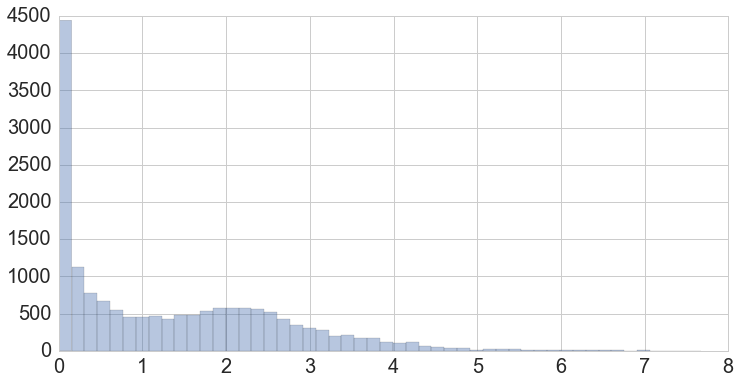

In [121]:
sns.distplot(preds, kde=False, bins=50)

In [126]:
reg = LinearRegression()

In [127]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
lin_preds = reg.predict(X_train)

In [130]:
np.sqrt(mean_squared_error(lin_preds, y_train))

0.71967570858315744

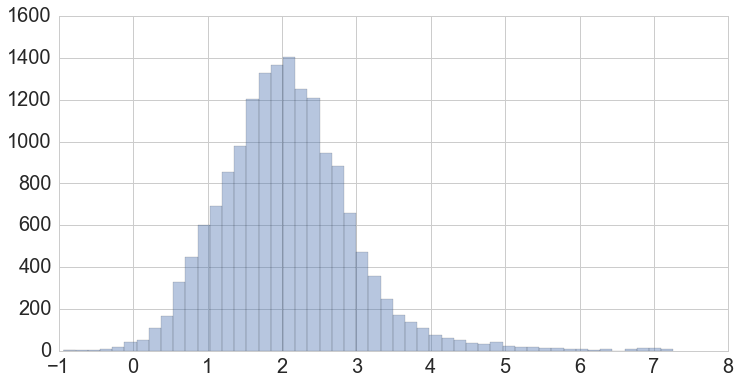

In [131]:
sns.distplot(lin_preds, kde=False, bins=50)